<a href="https://colab.research.google.com/github/talanthier/Math-152/blob/main/Exploration2_randomwalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Walks (Group 3)


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from PIL import Image # Load the package.
from google.colab import files
import math
%matplotlib inline

## 2D Random Walk with Variable Step Size and Unrestricted Direction

The most basic 2D random walk has a fixed step size with 4 possible directions: up, down, left, right. The following function simulates a 2D random walk in which you may travel in any direction with any step size between $0$ and $1$.

The function takes the number of steps `steps` as well as the starting point for our random walk `x0` and `y0`. At every step, our function chooses a random step size between $0$ and $1$ as well as a direction from $0$ to $2\pi$ radians. The random walk then moves in the given direction with the specified random step size. Essentially our function is choosing a point within the unit circle. We then add the $x$ and $y$ components of the given point to our current position on the 2D plane.

The random walk is stored in 2 separate numpy arrays for the $x$ and $y$ coordinates indexed by the step. The first elements in the arrays represents our starting coordinates while the last elements in these 2 arrays corresponds to the $x$ and $y$ coordinates where the random walk ends.

In [ ]:
def variable_stepsize_random_walk(steps = 100, x0 = 0, y0 = 0):
    x = np.zeros(steps)
    y = np.zeros(steps)
    x[0] = x0
    y[0] = y0
    for i in range(1, steps):
        step_size = np.random.random()
        x[i] = x[i-1]
        y[i] = y[i-1]
        direction = 2*np.pi*np.random.random() # chooses a direction between 0 and 2pi
        x[i] += np.cos(direction)*step_size
        y[i] += np.sin(direction)*step_size
    return x,y  

The code block below is for our matplotlib plot. This code simulates 1000 random walks as described above with 1000, 500, and 100 steps each with an starting point of $(0,0)$. So in total, we are simulating $3000$ random walks. We are then keeping track of each of the endpoints of the random walks as well as the number of steps in a numpy array. In order to make plotting easier, we converted our numpy array into a Pandas dataframe and created a jointplot of the $x$ and $y$ endpoints using seaborn. The jointplot is shown below.

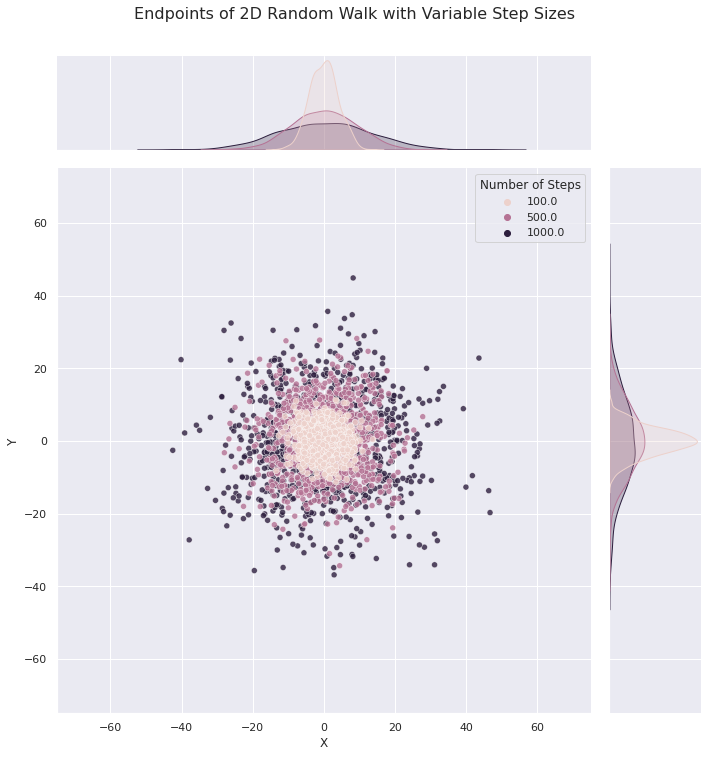

In [ ]:
num_iter = 1000
list_num_steps = [1000,500,100]
count = 0
endpoints = np.zeros([num_iter*len(list_num_steps),3])
for j in range(len(list_num_steps)):
    count = num_iter*j
    for i in range(num_iter):
        x,y = variable_stepsize_random_walk(list_num_steps[j],0,0)
        endpoints[i + count] = [x[-1], y[-1], list_num_steps[j]]
df = pd.DataFrame(endpoints, columns = ['X','Y','Number of Steps']) # converting data to Pandas dataframemake for easier plotting

sns.set()
grid = sns.jointplot(data = df, x = 'X', y = 'Y', hue = 'Number of Steps',  alpha = 0.8,
                     height = 10, xlim = (-75,75), ylim = (-75,75))
grid.fig.suptitle('Endpoints of 2D Random Walk with Variable Step Sizes',size = 16, y=1.05)
plt.show()

As you can see, on the center plot in the figure, we have a scatter plot of the endpoints. Each point is color coded indicating the number of steps taken to reach the given endpoint. In the plot at the top of the figure, we have 3 separate plots of the estimated probability density functions for the $x$ endpoints. Once again, each curve is color coded to indicate the number of steps taken in the given random walk. The plot to the right of the main plot shows the estimated probability density functions for the $y$ endpoints.

Looking at the scatter plot, it looks like the endpoints are centered around the origin as expected. If we chose a different starting point $(x_0, y_0)$, we would still expect our plot to be centered around $(x_0, y_0)$. But how close points are to the origin appear to be dependent on the number of steps. As we can see, it looks like almost all of the endpoints for the random walks with step size $100$ appear to be in the interval $(-25,25)$ for both $x$ and $y$. Meanwhile the random walks for $1000$ and $500$ steps reach significantly farther from the origin. This is shown in the density plots for $x$ and $y$ as the tails for $500$ and $1000$ steps are much longer than the left and righthand tails for steps $= 100$.

Also looking at the densities for the $x$ and $y$ coordinates of the endpoints, the endpoints for the $x$ and $y$ endpoints appear to approximately normally distributed with mean $x_0 = y_0 = 0$ shown by the symmetric bell curve shape with a single peak at $0$. But while the mean of the $x$ and $y$ coordinates for the endpoints appear to be independent of the number of steps, the spread of the distribution appears to be directly linked to the number of steps. With $100$ steps we have a very high peak at $0$ with very little weight in the tails. Meanwhile with $1000$ steps, there is a smaller peak at $0$ but a lot more weight spread out further from the origin. This indicates that a larger number of steps results in a larger spread.

In [ ]:
import numpy as np
import math
from PIL import Image
from google.colab import files

In [ ]:
files.upload()
image = Image.open('SeedBackdrop.png')
seed = image.resize((200,200))

Saving SeedBackdrop.png to SeedBackdrop (3).png


##A Random Walk of Life

In the spirit of Conway's original Game of Life, we now construct a similar environment using the principals of the random walk and the Python Imaging Library.

We initiate our game with a center seed containing $4$ entities, each corresponding to a pixel value in the set $\{0,1,\dots,255\}^3$ detailed below.






1.   A = (255,0,0)
2.   B = (0,255,0)
3.   C = (0,0,255)
4.   D = (255,255,255)

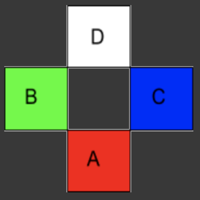

In [ ]:
display(seed)

We label the center (empty) pixel $(0,0)$, and thus our seed pixels begin at $(0,-1),(-1,0),(0,1),$ and $(1,0)$ respectively, which we also take to be the "direction" for each seed pixel, and $t=0$ in this initial state. To induce the evolution of our system and our image, which we define as the set of colored pixels, we describe a "step" function representing each step in a random walk beginning at our seed, in the direction specified by the pixels. First we must define the "state" of our system at time $t$, denoted $State(t)$, as having 2 components:


$$State(t) := \{\mathbb{E}_t,\mathbb{M}_t\}$$

*   $\mathbb{E}_t :=$ The set of pixels composing the edge of our image at time $t$
*   $\mathbb{M}_t :=$ The matrix corresponding to the entire image and all pixel "directions" at time $t$.


Each entity $e \in \mathbb{E}_t$ can be described by the triple $(Position,Color,Direction) = (P,C,D)$ where:

* $P = (x,y) \in \mathbb{R}^2 $
* $C = (R,G,B) \in \{0,1,\dots,255\}^3$
* $D = (i,j) \in \{(1,0),(0,1),(-1,0),(0,-1)\},$ 

Thus, $\mathbb{E}_t$ describes $n$ such leading entities $e$, each represented by 7 numerical values. For example:

$\mathbb{E}_0 = \{A,B,C,D\} = \{\big((0,-1),(255,0,0),(0,-1)\big),\big((-1,0),(0,255,0),(-1,0)\big),\dots,\dots\}$


We define a pixel $p$ at position $P$ to be $empty$ if $C_p$ = (0,0,0).

We now construct a "step" function, i.e, the random walk component of the simulation. Our step function will be split into 2 components: $Action$ and $Response$. 






$Action$: Each entity $e$ will advance 1 pixel in the direction $D_e$, from position $P_{e , t}$ to $P_{e , t+1}$ with a probability $\sigma$ (taken as input) of turning, and this turn has a $\frac{1}{2}$ probility of being 90 degrees to the right or to the left. 

$Response$: The response will be split into 2 cases:

Case 1) If $P_{e,t+1}$ is empty, do nothing. 

Case 2) If $P_{e,t+1}$ is non-empty, $C_{P_{e,t+1}} = average(C_{P_{e,t}},C_{P_{e,t+1}})$


Where $average\big((a_1,a_2,a_3),(b_1,b_2,b_3)\big) := \big(floor(\frac{a_1 + b_1}{2}),floor(\frac{a_2 + b_2}{2}),floor(\frac{a_3 + b_3}{2})\big) $

Intutively, if the color corresponding to the pixel that $e$ lands on is black, the color of $e$ stays the same, but if the pixel is already colored, then the color of $e$ is set to the average of the two colors. After this decision is made, $e$ continues on in the same direction at the next step of the walk. 

We will terminate our walk by specifying as input a maximum number of time steps $t_{max}$.

Now that we have established the rules of the walk we are ready to write our necessary functions to implement it.

Let us begin with an initialization function, creating a $800\times800\times5$ array of zeros, which we will ultimately truncate to $400 \times 400 \times 3$, the extra space is to allow the walk to go off the final image, and to account for the pixel directions. We call this matrix $M$ and place our seed at the center. This corresponds to $\mathbb{M}_t$ by $M(x,y,R,G,B,i,j)$. We also return an object $edges$ that contains the $(x,y)$ values corresponding to the elements of $\mathbb{E}_t$.

In [ ]:
def walk_init():
  '''
  This functions initializes our walk by creating an array of zeros of 
  the correct size and placing our "seed" in the center.
  '''
  M = np.zeros((1200,1200,5),dtype=np.uint8)
  M[200,201,0:3] = [255,255,255]
  M[200,201,3:] = [0,1]
  M[201,200,0:3] = [0,0,255]
  M[201,200,3:] = [1,0]
  M[199,200,0:3] = [255,0,0]
  M[199,200,3:] = [-1,0]
  M[200,199,0:3] = [0,255,0]
  M[200,199,3:] = [0,-1]
  edges = np.array([[200,201],[201,200],[199,200],[200,199]])
  state = [M,edges]
  return state 


Now we create a function that is excecuted if our "turning condition" is met. This function simply changes the "current direction" object to the right or left by 90 degrees with equal chance. 

In [ ]:
def takeaturn(currentdirection):
  '''
  This function serves to induce an equal probability right or left turn
  applied to the vector (currentdirection)
  '''
  turndirection = np.random.choice(range(2))
  directions = np.uint8([[0,1],[1,0],[0,255],[255,0]])
  
  for i in range(4):
    direction = directions[i]
    if (currentdirection[0] == direction[0]) and (currentdirection[1] == direction[1]):
      if turndirection == 0:
        newdirection = directions[(i+1)%4]
      else:
        newdirection = directions[(i-1)%4]

  return(newdirection)

Next comes the meat and potatoes of our simulation, the "step function" corresponding to an iteration of our system. This step function has a few tasks to complete:

*   Get the current set of Edges and Image
*   For each edge, decide if it is going to turn and move it to the new destination
*   Determine if any of the edges have reached a colored pixel, and if so average the colors
*   Re-populate and return the Image and Edges objects    



In [ ]:
def step_function(state,sigma):
  '''
  This function applies the logic required to create the iteration
  described above.
  (state) = (Matrix,Edges) is input and output
  '''
  edges = state[1]
  image = state[0]
  edgecount = 0
  zerocolor = np.array([0,0,0],dtype=np.uint8)

  for edge in edges:

    currentdirection = image[edge[0],edge[1],3:]

    turnprobability = np.random.choice(range(int(1/sigma)))

    currentcolor = image[edge[0],edge[1],0:3]
    nextedge = np.array([0,0],dtype=np.uint8)

    if turnprobability == 0:
      currentdirection = takeaturn(currentdirection)

    if currentdirection[0] == np.uint8(255):
      tomove = [-1,0]
    elif currentdirection[0] == np.uint8(1):
      tomove = [1,0]   
    elif currentdirection[1] == np.uint8(255):
      tomove = [0,-1]
    else:
      tomove = [0,1]
    
    nextedge = edge + tomove

    edges[edgecount] = nextedge

    nextcolor = image[nextedge[0],nextedge[1],0:3]

    if nextcolor.any() != zerocolor.any():

      nextcolor[0] = np.uint8((nextcolor[0] + currentcolor[0])//2)
      nextcolor[1] = np.uint8((nextcolor[1] + currentcolor[1])//2)
      nextcolor[2] = np.uint8((nextcolor[2] + currentcolor[2])//2)

    else:

      nextcolor = currentcolor

    image[nextedge[0],nextedge[1],0:3] = nextcolor
    image[nextedge[0],nextedge[1],3:] = currentdirection
    edgecount += 1

  state = (image,edges)  
  return state

Now we are ready to create our "head" function, the place from which we actually want to initiate our Random Walk of Life. We take as input the afformentioned $t_{max}$ and $\sigma$ parameters and this function returns the matrix corresponding to our "Random Walk of Life" at step $t = t_{max}$.

In [ ]:
def random_walk_life(t_max,sigma,r=0):
  '''
  This function takes integer t_max and fraction with numerator 1 sigma as inputs 
  and conducts a random walk with these parameters.
  Output is the PIL image object, or the matrix corresponding to this object
  if r is true. 
  '''
  if math.floor(1/sigma) != (1/sigma):
    raise Exception("Please enter a sigma with an integer inverse")
  t = 0;
  state = walk_init()
  while t <= t_max:
    state = step_function(state,sigma)
    t += 1
  M = state[0]
  image_matrix = M[:400,:400,0:3]
  if r:
    return(image_matrix)
  img = Image.fromarray(image_matrix)
  return(img)  
  

After testing `random_walk_life(t_max,sigma)` for multiple values of each argument, we are confident in its functionality and ready to create our final PIL image. Both parameters change the behavior of our walk substantially, so a logical consolidation of this behavior is a $1200\times2000$ PIL image containing 15 seperate walks produced by `random_walk_life(t_max,sigma)` for various values of $t_{max}$ and $\sigma$. We arrange them according to the following scheme: $\sigma$ remains constant across the horizontal and $t_{max}$ remains constant along the vertical.








In [ ]:
def composite_PIL_image():

  bigarray = np.zeros((2000,1200,3),dtype=np.uint8)

  bigarray[:400,:400,:] = random_walk_life(12000,1,1)
  bigarray[400:800,:400,:] = random_walk_life(12000,1/2,1)
  bigarray[800:1200,:400,:] = random_walk_life(12000,1/3,1)
  bigarray[1200:1600,:400,:] =random_walk_life(12000,1/5,1)
  bigarray[1600:2000,:400,:] =random_walk_life(12000,1/8,1)

  bigarray[:400,400:800,:] = random_walk_life(6000,1,1)
  bigarray[400:800,400:800,:] = random_walk_life(6000,1/2,1)
  bigarray[800:1200,400:800,:] = random_walk_life(6000,1/3,1)
  bigarray[1200:1600,400:800,:] =random_walk_life(6000,1/5,1)
  bigarray[1600:2000,400:800,:] =random_walk_life(6000,1/8,1)

  bigarray[:400,800:1200,:] = random_walk_life(2000,1,1)
  bigarray[400:800,800:1200,:] = random_walk_life(2000,1/2,1)
  bigarray[800:1200,800:1200,:] = random_walk_life(2000,1/3,1)
  bigarray[1200:1600,800:1200,:] =random_walk_life(2000,1/5,1)
  bigarray[1600:2000,800:1200,:] =random_walk_life(2000,1/8,1)
 
  bigimage = Image.fromarray(bigarray)

  return bigimage


Okay, now comes the moment of Truth. Make sure your brightness isn't too low! I recommend opening the image produced in a new tab for viewability. (Also note that there is a very low probability one of the walks will exceed the array boundary and numpy will get unnhappy, in which case just re-run the cell. We could fix this, but decreasing this probability further adds to compute-time significantly)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in ubyte_scalars


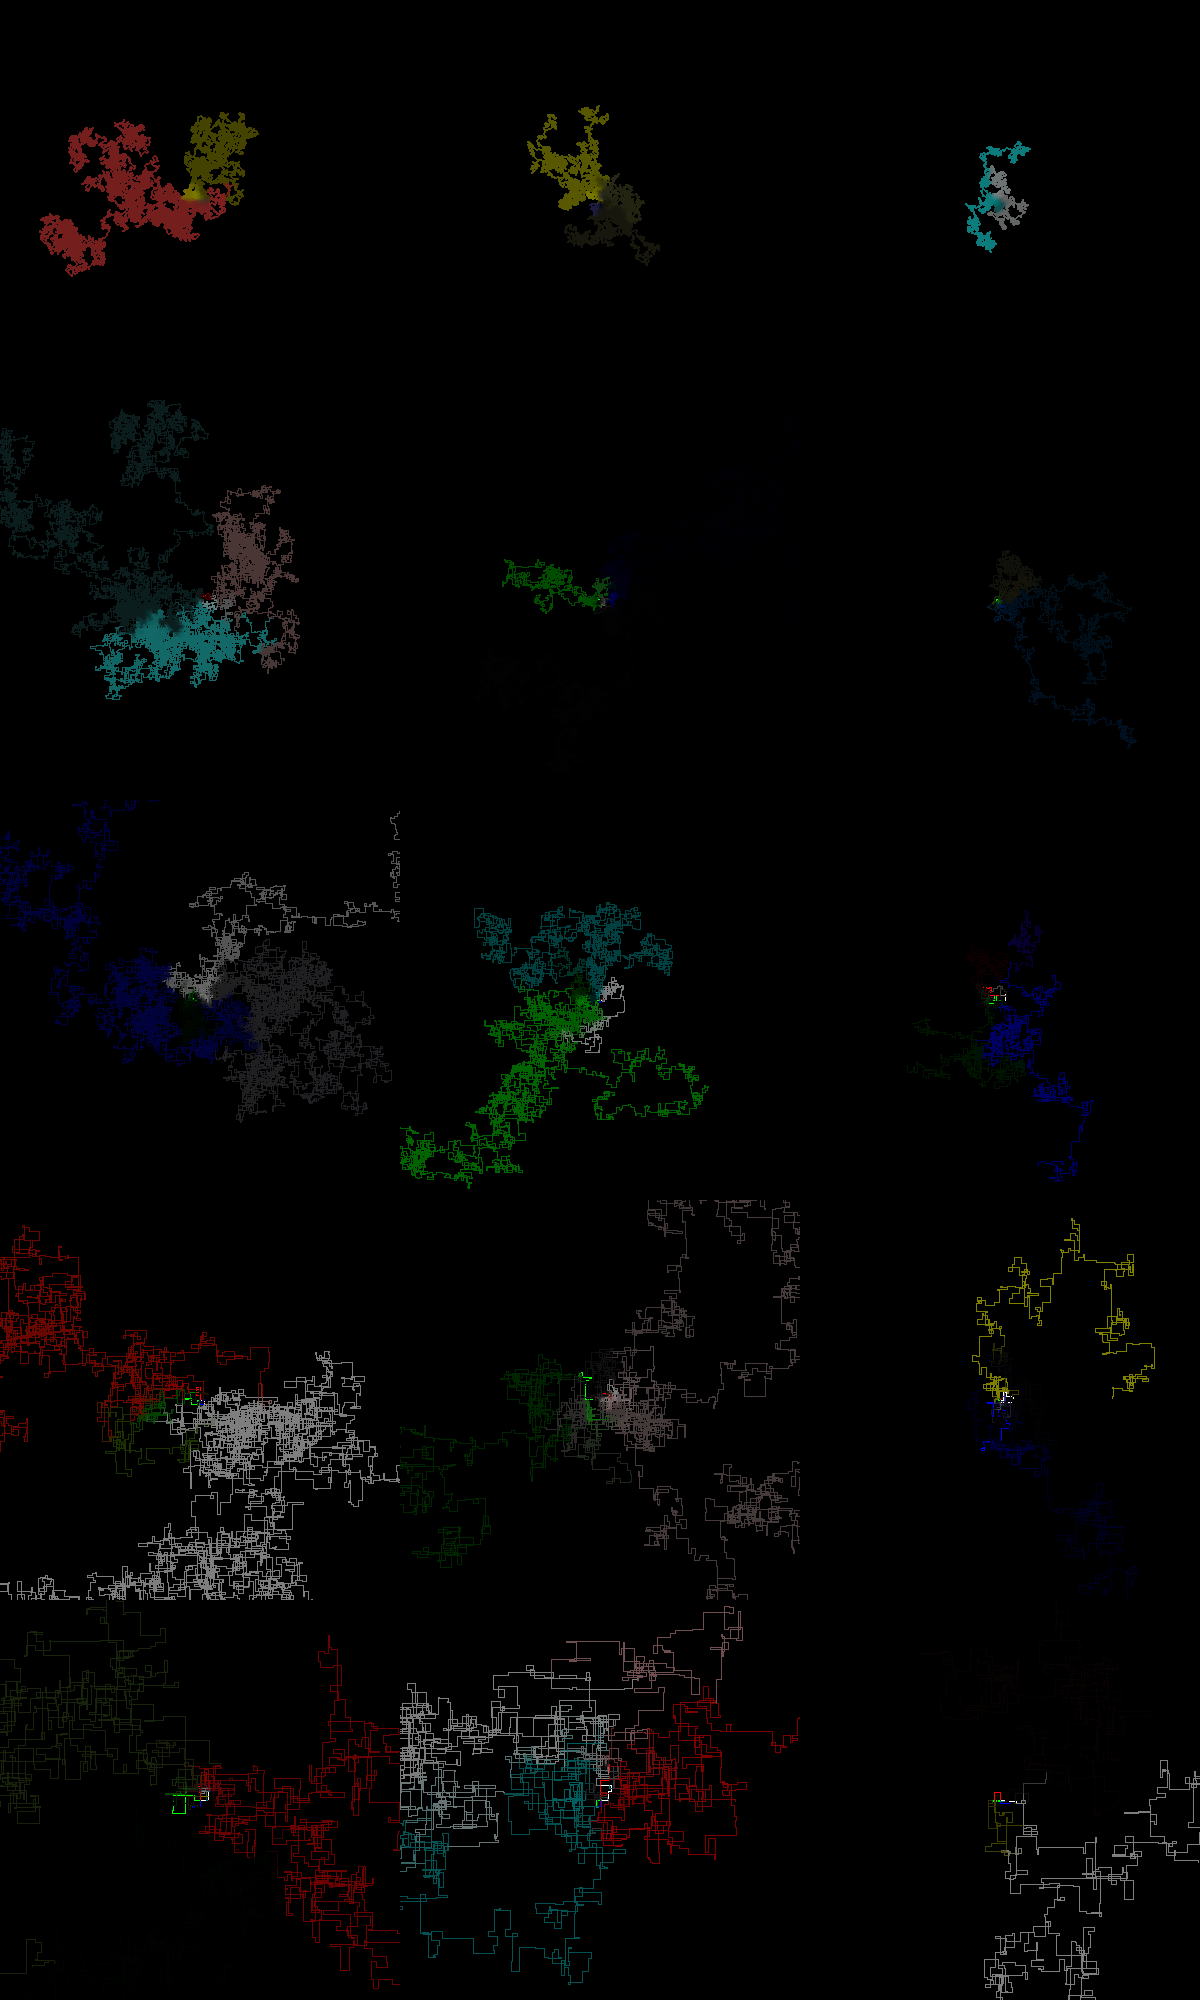

In [ ]:
display(composite_PIL_image())

Fantastic, it worked! If the output of the above cell is aesthetically displeasing to you, please run it again. We can clearly see the effects that varying our two parameters, $\sigma$ and $t_{max}$, has on the final image. The walks on the top row all have $\sigma = 1$, corresponding to a guaranteed turn for each entity at each step. This causes many entities to interact (and mix colors) very quickly, and also makes it very difficult for the entities to stray far from the origin, even after 12,000 iterations. 

The second row, corresponding to $\sigma = \frac{1}{2}$ (or about a 50% chance for an entity to turn at a given step), is my personal favorite, with a nice mix of density and contrast. 

As we approach the bottom and our $\sigma$ values approach 0, the paths taken by our entities get sparser and sparser, which illucidates the actual behavior of the system. In the bottom row, where $\sigma = \frac{1}{8}$, we can see a hotspot of color and brightness in the center, corresponding to the behavior of the seed near the beginnning of our walk. We can see how different colors are combined and absorbed, with one or two colors typically emerging as the dominant color of the walk.

As a closing note, let's analyze how the choices made in creating this model limit its behavior, and how we could possibly improve upon this in the future.

The first obvious problem comes from trying to represent 4 entities in the RGB system, which is more suitable for 3. As the natural "basis vectors" (255,0,0 etc.) were chosen for the first 3 entities, the choice of (255,255,255) for the fourth entity was somewhat arbitrary, motivated primarily to mitigate the effect of our $average(a,b)$ function. In hindsight, choosing a 4-dimensional color model like CMYK would have been more appropriate.

The second thing to note is the behavior of $average(a,b)$ itself. As we are bounded on the top by (255,255,255), it follows that our average function will, in the aggregate, cause the total value of our collection of colors to decrease, correspoding to generally darker (or at least more homogeneous) colors as we move away from the origin. This is because the first possible change to the color states results from $\frac{255 + 0}{2} \approx 122$, the second from a random choice from $\{\frac{255 + 0}{2},\frac{122+0}{2},\frac{122 + 255}{2}\}$, and so on. We could easily change $average(a,b)$ to any such $convolution(a,b) : \{0,1,\dots,255\}^3 \rightarrow \{0,1,\dots,255\}^3$, and this change would surely affect the coloration of our walks. Some simple alternative convolutions that come to mind are addition/subtraction/multiplication mod 255. In the future, it would be interesting to make the type of convolution an input to our `random_walk_life()` function.

This concludes our exploration of Random Walks using the Python programming language and associated tools. Thank you for joining us!